# 규칙을 이용해서 문자를 추출하는 정규식과 메타 문자

정규식이란 특정한 규칙을 가지고 있는 문자열을 표현하는데 사용되는 규칙을 가진 언어이다. 이 때, 문자들을 찾거나 조작하기 위해서 [],?,*,+,{} 등의 특별한 의미를 갖는 문자들을 사용한다.

파이썬에서 정규식을 사용하려면 re 모듈을 포함시켜야 한다. 그리고나서 필요한 함수를 호출하면 되는데, 예를 들어  re.search()를 사용하면 정규식에 매치되는 문자열을 찾을 수 있다. 다음과 같은 2개의 문장에 대하여 'Life'라는 문자열이 포함되어 있는가 검사를 해보자.

In [2]:
import re
txt1 = 'Life is too short, you need pythone.'
txt2 = 'The best moments of my life.'
print(re.search('Life', txt1))
print(re.search('Life', txt2))

<re.Match object; span=(0, 4), match='Life'>
None


이제 <_sre.SRE_Match object;..> 라는 다소 난해한 출력결과를 다시 한 번 살펴보자. 이 출력을 해석하기 위해서 다음과 같이 re.search()의 결과값을 match라는 변수에 할당하고 이 변수의 group(), start(), end(), span() 함수를 호출해 보자.

In [4]:
match = re.search('Life', txt1)
match.group

<function Match.group>

group() 메소드는 정규표현식의 검색 결과가 여러 개일 경우 묶음을 위해서 필요하며 start()와 end()는 정규표현식을 통해 일치하는 문자의 시작과 끝 인덱스를 나타낸다. 마지막으로 span()은 일치하는 구간을 슬라이싱하기 위한 인덱스를 나타낸다.

In [5]:
match.start()

0

In [6]:
match.end()

4

In [7]:
match.span()

(0, 4)

In [10]:
txt1[0:2]

'Li'

정규 표현식의 함수 search(탐색문자열, 원본문자열)의 결과를 잘 살펴보자. 원본문자열에서 찾고자 하는 탐색문자열을 찾을 수는 있으나 txt2의 탐색과 같이 소문자 1로 시작하는 life는 찾지 못하고 Life만 찾는 문제점이 있다.

In [11]:
print(re.search('Life|life', txt2)) # 또는

<re.Match object; span=(23, 27), match='life'>


이 경우 txt2의 뒷부분에 'life'가 있기 때문에 span(23, 27) 결과를 통해 'life'가 있는 곳의 인덱스를 제대로 찾아서 표시해 준다. 이때 사용된 세로로 된 작대기 모양의 연산자 |는 'Life|life'를 찾으라는 의미가 아니고

Life 또는 life 문자열을 찾으라는 의미로 해석된다.

Life나 life는 첫 글자만 다르고 나머지 글자들이 같기 때문에 다음과 같은 표현식을 사용해도 동일한 결과를 얻을 수 있다.

In [14]:
print(re.search('[Ll]ife', txt2))

<re.Match object; span=(23, 27), match='life'>


앞의 예제와 마찬가지로 [Ll]ife는 Life혹은 life를 의미하는데 큰괄호 []는 문자 선택의 범위를 표현하는 문자이다. 예를 들어 [0-9]의 경우 0부터 9까지의 모든 숫자 문자를 의미한다. 이와 같이 정규 표현식에서 [], -, |와 같은 특별한 의미를 가지는 문자들을 사용해서 검색하거나 교체하기도 한다. 이러한 특수한 용도의 문자를 메타문자라고 한다.

이제 정규 표현식에서 첫문자를 의미하는 문자인 ^에 대해서 살펴보자. 다음과 같은 txt1, txxt2, txt3에서 Life를 검색하고자 한다. 이때 우리는 문장의 첫 단어가 Life인 경우에 한정하여 문자열을 검색하고자 한다. 이때 다음과 같이 ^를 사용할 수 있다.

In [18]:
txt1 = 'Life is too short, you need python'
txt2 = 'The best moments of my life'
txt3 = 'My Life My Choice'
print(re.search('^Life', txt1))
print(re.search('^Life', txt2))
print(re.search('^Life', txt3))

<re.Match object; span=(0, 4), match='Life'>
None
None


위의 결과를 살펴보면 검색시에 ^Life를 이용하여 txt3을 검색할 경우, 메타문자 ^에 의하여 문장의 첫 단어가 Life인 문장만을 검색하므로 문장 중간에 Life가 있음에도 불구하고 None을 출력하는 것을 볼 수 있다.

이제 다음의 문자열들에 대해서 위의 정규식을 적용해 보자. txt1, txt2는 모두 문장내에 life라는 문자를 포함하고 있다. 이 중에서 문자열 내에 가장 마지막 단어로 life가 들어간 문자열을 찾고자 한다. 이럴 경우 표의 두번째에 있는 $ 기호를 사용하면 간단하게 마지막 단어가 life인 문자열을 찾을 수 있다.

In [20]:
txt1 = 'Who are you to judge the life I live'
txt2 = 'The best moments of my life'
print(re.search('life$', txt1))
print(re.search('life$', txt2))

None
<re.Match object; span=(23, 27), match='life'>


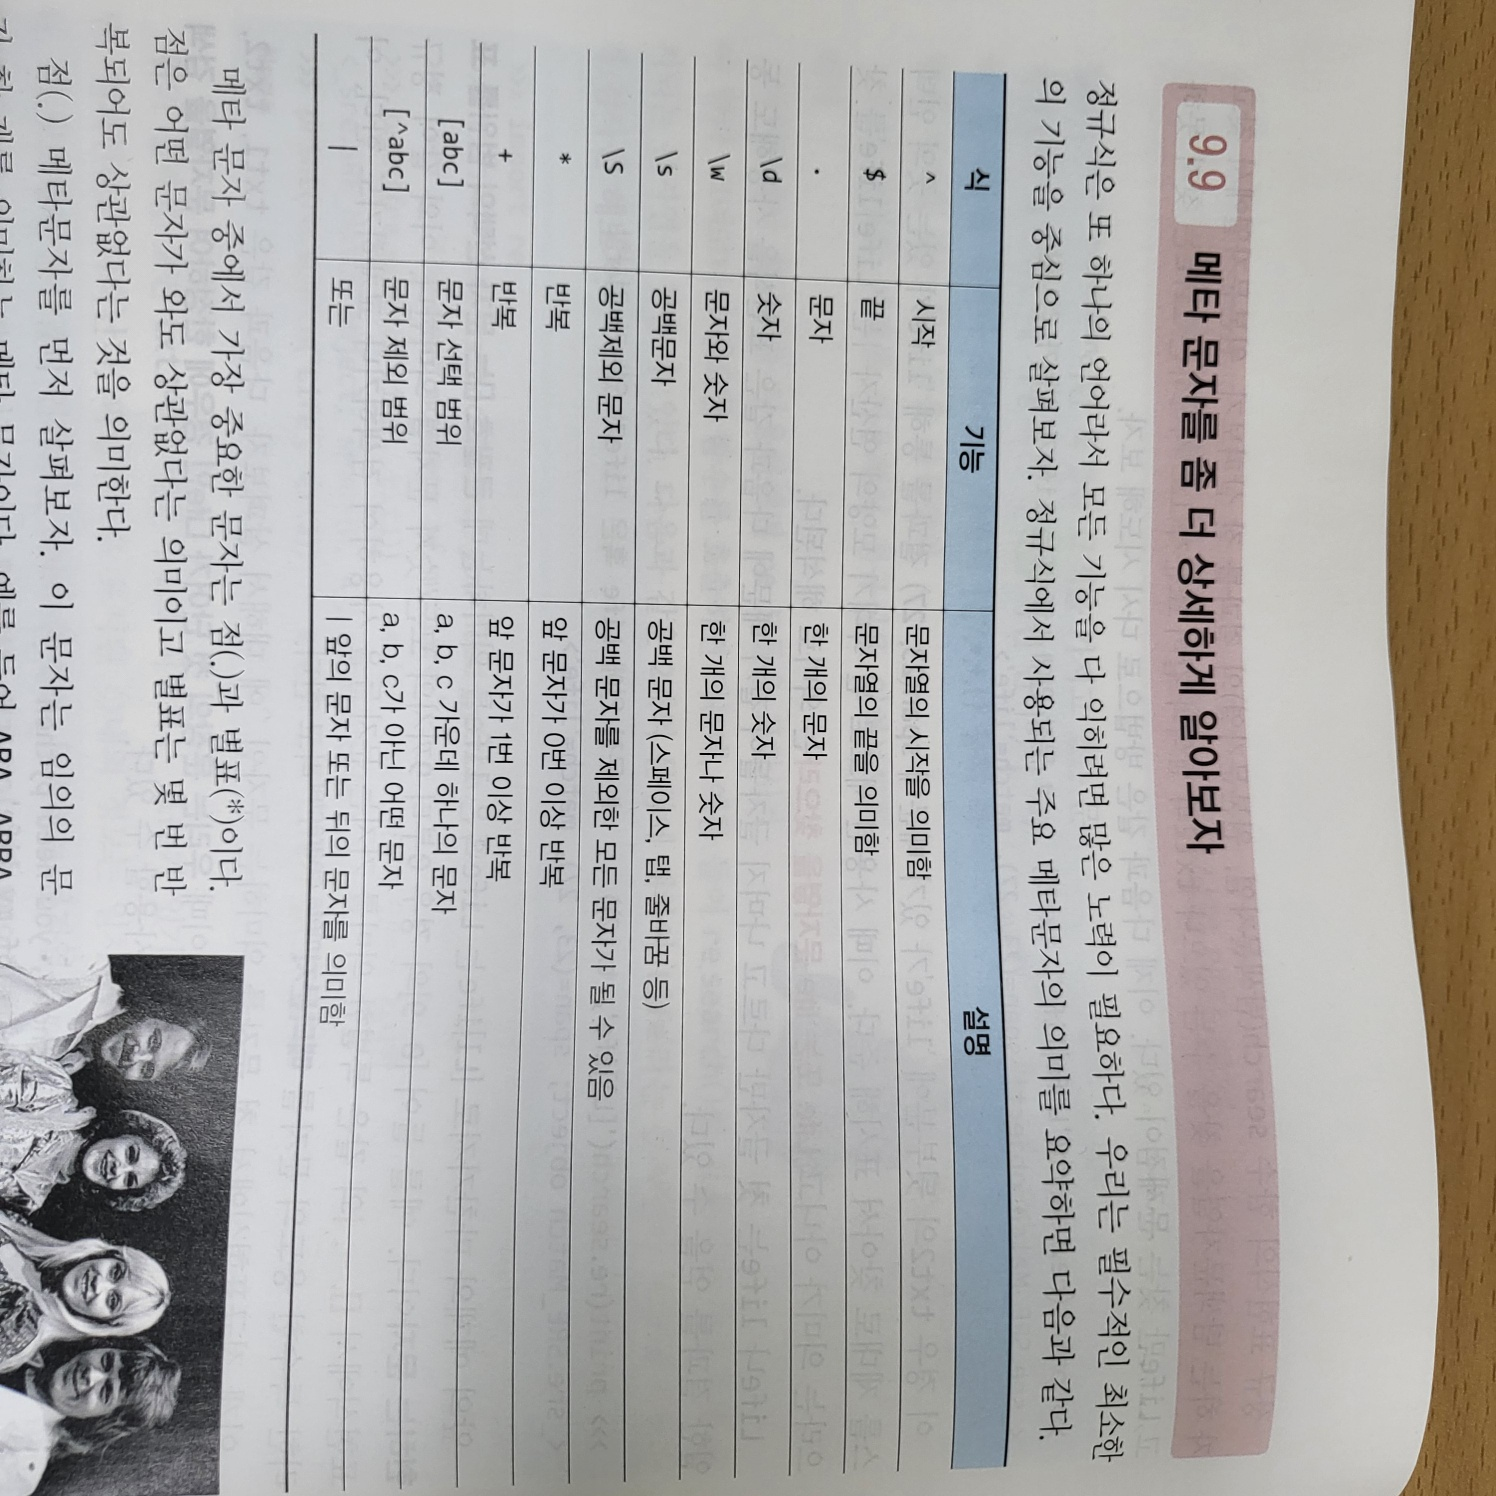

메타 문자 중에서 가장 중요한 문자는 점(.)과 별표(*)이다. 점은 어떤 문자가 와도 상관없다는 의미이고 별표는 몇 번 반복되어도 상관없다는 것을 의미한다.

점(.) 메타문자를 먼저 살펴보자. 이 문자는 임의의 문자 한 개를 의미하는 메타 문자이다. 예를 들어, ABA ABBA ABBBA라는 문작 있을 경우 이 문자들 중에서 A..A라는 조건을 만족하는 문자는 ABBA 뿐이다. 나머지는 A와 A사이에 B문자가 각각 1개, 3개이므로 일치하지 않는다. A..A는 ABBA와도 일치하지만 AZZA, AAMA... 등 A로 시작해서 A로 마치는 네 글자의 다른 문자열과도 일치한다.

In [23]:
re.search('A..A', 'ABA')

In [24]:
re.search('A..A', 'ABBA')

<re.Match object; span=(0, 4), match='ABBA'>

메타 문자 중에서 매우 강력한 문자가 바로 별표(*)이다. 이 문자는 직전에 있는 임의의 패턴을 0회 이상의 수로 반복되는 문자와 매치된다. 예를 들어 AB\*는 A, AA, AB, CAB, ABB, X-MAN, CABBBBBA 등의 어떤 문자라도 A로 시작하고 B가 0회 이상 반복된다면 일치하는 것으로 간주한다. 이 때, CABBBBBA는 ABBBB라는 패턴이 AB\*의 메타문자의 문법과 일치하므로 출력 결과가 match = 'ABBBBB'로 나타난다. 그러나 J-HOPE은 AB\* 패턴과 일치하지 않는다.

In [25]:
re.search('AB*', 'A')

<re.Match object; span=(0, 1), match='A'>

In [26]:
re.search('AB*', 'AA')

<re.Match object; span=(0, 1), match='A'>

In [27]:
re.search('AB*', 'J-HOPE')

In [28]:
re.search('AB*', 'X-MAN')

<re.Match object; span=(3, 4), match='A'>

In [33]:
re.search('AB*', 'ABBBBBA')

<re.Match object; span=(0, 6), match='ABBBBB'>

In [35]:
re.search('AB*', 'CABBBBBBA')

<re.Match object; span=(1, 8), match='ABBBBBB'>

다음으로 널리 사용되는 메타 문자 ?에 대하여 알아보자. 이 문자는 직전에 있는 임의의 문자를 0회 또는 1회 반복한 패턴에 매치된다. 따라서 AB?는 A에도 일치하고 AB에도 일치한다. 앞의 예제에 나타난 동일한 단어들에 대해서 AB? 정규식을 적용하여 검색해 보자.

In [29]:
re.search('AB?', 'A')

<re.Match object; span=(0, 1), match='A'>

In [30]:
re.search('AB?', 'AA')

<re.Match object; span=(0, 1), match='A'>

In [31]:
re.search('AB?', 'J-HOPE')

In [32]:
re.search('AB?', 'X-MAN')

<re.Match object; span=(3, 4), match='A'>

In [34]:
re.search('AB?', 'ABBBBBA')

<re.Match object; span=(0, 2), match='AB'>

In [36]:
re.search('AB?', 'CABBBBBBA')

<re.Match object; span=(1, 3), match='AB'>

앞서 살펴본 *와 그 결과가 비슷해 보이지만 CABBA에서 조건에 맞는 문자가 AB이며 CABBBBBA 문자 역시 조건에 맞는 문자가 AB라는 점에서 큰 차이점이 있다.

메타문자 +는 직전에 있는 임의의 패턴을 1회 또는 그 이상의 수로 가급적 많이 반복하는 패턴에 대해서 매치되는 표현식이다. 따라서 AB+는 A와는 매치되지 않으며 AB, ABB, ABBB, CABBA와 같은 피턴의 문자열과 일치한다. 

In [37]:
re.search('AB+', 'A')

In [38]:
re.search('AB+', 'AA')

In [39]:
re.search('AB+', 'J-HOPE')

In [40]:
re.search('AB+', 'X-MAN')

In [41]:
re.search('AB+', 'ABBBBBA')

<re.Match object; span=(0, 6), match='ABBBBB'>

In [42]:
re.search('AB+', 'CABBBBBBA')

<re.Match object; span=(1, 8), match='ABBBBBB'>

다음으로 검색 명령인 findall()에 대하여 알아보도록 하자.

정규 표현식의 findall()을 사용하면 정규식을 만족하는 모든 문자열들을 추출할 수 있다. 예를 들어, txt3의 경우 My가 두 번 나타나지만 search()를 사용하면 가장 먼저 나타나는 My의 인덱스만을 반환하다. 반면, 다음과 같이 findall()을 사용하여 txt3에 나타나는 모든 My를 뽑아 볼 수 있다.

In [43]:
txt3 = 'My life my life in the sunshine'
re.findall('[Mm]y', txt3)

['My', 'my']

### 정규식을 활용해서 멋지게 검색을 하자

UN의 세계 인권 선언문은 https://www.un.org/en/universal-declaration-human-rights/를 방문하면 텍스트를 얻을 수 있다.

이 선언문은 30개의 조(article)로 구성되어 있는 데, 어떤 조는 (1), (2)와 같은 방식으로 항이 매겨진 경우가 있다. 이렇게 (숫자) 형태로 항을 구분한 경우를 찾아 해당 항을 출력하자.

제일 먼저 (숫자) 형태의 항은 문장의 처음에 나타나야 한다. 이렇게 시작하는 텍스트를 정규식으로 나타내면 ^ 다음에 ( 문자가 오게 해야 한다. 그런데 ( 문자는 정규표현식에서 메타문자이므로 ( 문자를 표현하고 싶으면 문자 이스케이프를 이용하여 \) 형태로 표현해야 한다. 다음으로 숫자가 와야 하는데, 이는 [0-9] + 또는 \d+라고 표시하면 된다. \d는 숫자를 의미하는데, [0-9] 역시 0에서 9까지의 문자 중에서 하나를 의미하기 때문에 두가지 표현식이 모두 가능하다. +는 1회 이상 반복을 의미하기 때문에 [0-9]+이면 모든 숫자를 의미한다. 그리고 닫히는 괄호 역시 이 문자를 지칭하는 ) 문자가 와야 할 것이다. 이는 \) 형태로 표현하면 된다. 이상과 같은 작업을 위해서는 모든 라인을 읽은 뒤어, rstrip()을 이용하여 오른쪽에 있는 모든 공백 문자를 제거하는 것이 필요하다. 자 이제 다음과 같은 간단한 표현식으로 놀라운 결과를 얻을 수 있다.

In [49]:
import re

f = open('/content/UNDHR.txt')

for line in f:
  line = line.rstrip() 
  if re.search('^\(\d+\)', line):
    print(line)

(1) Everyone charged with a penal offence has the right to be presumed innocent until proved guilty according to law in a public trial at which he has had all the guarantees necessary for his defence.
(2) No one shall be held guilty of any penal offence on account of any act or omission which did not constitute a penal offence, under national or international law, at the time when it was committed. Nor shall a heavier penalty be imposed than the one that was applicable at the time the penal offence was committed.
(1) Everyone has the right to freedom of movement and residence within the borders of each state.
(2) Everyone has the right to leave any country, including his own, and to return to his country.
(1) Everyone has the right to seek and to enjoy in other countries asylum from persecution.
(2) This right may not be invoked in the case of prosecutions genuinely arising from non-political crimes or from acts contrary to the purposes and principles of the United Nations.
(1) Everyon

### 문제

1. 코드만 뽑아내라

In [57]:
import re

# 멀티라인 텍스트는 세 개의 따옴표를 사용하여 표현한다. 
txt = '''101 PythonProgramming
102 MAT LinearAlgebra
103 ENG ComputerEnglish'''

goal = re.findall('[1-9]+0[1-9]+', txt)
print(goal)

['101', '102', '103']


In [58]:
import re

# 멀티라인 텍스트는 세 개의 따옴표를 사용하여 표현한다. 
txt = '''101 PythonProgramming
102 MAT LinearAlgebra
103 ENG ComputerEnglish'''

goal = re.findall('\d+', txt)
print(goal)

['101', '102', '103']


2. 이메일만 뽑아내라

In [59]:
import re
txt = 'abc@facebook.com와 bbc@google.com에서 이메일이 도착하였습니다.'
goal = re.findall('[a-z]+@[a-z]+', txt)
print(goal)

['abc@facebook', 'bbc@google']


3. 패스워드 검사 프로그램

1. 최소 8글자

2. 적어도 하나의 영문자 대문자 및 소문자를 포함해야 한다.

3. 적어도 하나의 숫자를 포함해야 한다.

4. 다음에 나타난 특수문자[_, @, $. !] 중 하나를 반드시 포함해야 한다.

In [84]:
import re
password = input('패스워드를 입력하세요 : ')
if len(password) >= 8 and re.search('[a-z]+', password) and re.search('[A-Z]+', password) and re.search('[1-9]+', password) and re.search('[_@$!]+', password):
  print('유요한 패스워드!')
else :
  print('유요하지 않는 패스워드')

패스워드를 입력하세요 : qwerty1234
유요하지 않는 패스워드


### 정규직에서 특정 문자를 대체하는 함수 : sub()

파이썬 정규식에는 검색하는 함수인 search(), findall()와 함께 다음과 같이 특정한 문자열을 다른 문자열로 대체하는 sub() 함수도 존재한다. s 문자열 내의 특정단어 BTS를 re.sub() 함수로 인해 다른 단어로 대체해보겠다.

In [85]:
import re
s = 'I like BTS'
goal = re.sub('BTS', 'BLACK PINK', s)
print(goal)

I like BLACK PINK


만일 특정한 수에 대해서 이 숫자를 외부에 비공개로 하기 위하여 별표문자를 이용하여 숨기고자 할 경우에는 다음과 같이 사용하면 된다. 이를 위하여 다음과 같이 '[0-9]+' 혹은 '\d+'를 사용할 수 있다.

In [89]:
s = 'My lucky number 2 7 99'
a = re.sub('\d+', '*', s)
print(a)

My lucky number * * *
